# Eddy Current Brake Design Project

   The main goal of the project is to design an eddy current brake which will be used as a mechanical damper. For this purpose, the project contains two main parts. In the first part of the project, some technical details such as electro magnetic consept and mathematical calculations will be discussed. Then, in the second part, by using the information from the first part, geometrical structure will be designed and the proof of concept will be done by using a FEA software. as FEA software, for simulations COMSOL Multiphysics will be used.
   


## How does the eddy current brake work?

Before starting the finite elemet design and analysis, it is significant to clearly understand its working princple and its relation with electromagnetic rules and equations.

Eddy current brake in its simplest form consists of a disc of conductive material and a permanent magnet. It is also known as magnetic brake. The magnet generates a constant magnetic field on a specific area of the disc of conductive material. The position of that area does not change during the rotation of the disc. However, because of the motion, while one side of the area magnetic field decreases, on the other side of the area magnetic field increases. On these parts of the area, we can say that we have non-constant magnetic fields which will create another opposite directional magnetic fields that should compansate the change of the magnetic field for each side of the area. Then, these magnetic fields induce clockwise and counter-clockwise rotating currents which is called **eddy current**. Finally, the Lorentz forces from the currents slow the disc.

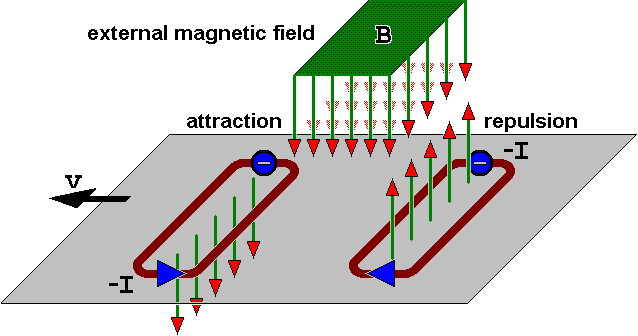

In [3]:
from IPython.display import Image
Image(filename='Images/eddy.png')

Before starting finite element analysis of the magnetic brake, lets see some important formulations about it. Firstly, Deriving equations for eddy current brake system is a high level electromagnetic problem. Also, it needs some scientific approaches and assumptions. Many scientists tried to formulize especially created torque in the system. Lets see some of the reaserches about the topic in the literature.

The first one is W.R. Smythe’s Model (1942). This model considers the problem as a disc of finite radius. For deriving an equation of the torque, it uses the magnetic field which created by eddy current. It models this magnetic field  as a pair of images receding with unuform velicity.

$T=\frac{\omega\gamma R^2\phi^2D}   {(\beta^2\omega^2\gamma^2+R)^2}$


This model is good at low speed but torque decreases too fast in high
speed. In this formula;
T => breaking toque,
$\omega$ => angular velocity,
$\gamma$ => 10^-9 / volume resistivity of the disc, 
$\phi$ => flux,
$\beta$ & D => constant coefficent,
R => reluctance of the electromagnet.

The other approach is D. Schieber’s Model (1974). This approach consider the system as a rotating system. In these kind of systems, both magnet and rotating disc has cylindirical geometry. The formulation is true for low speeds today. It cannot be said that For high speed rotation region the derivation is really valid.

$T=\frac{1}{2} \sigma\delta\omega\pi r^2 m^2 Bz^2 [1-\frac{(r/a)^2} {(1-(m/a)^2)^2}]$

In this formula;
$\sigma$ => electrical conductivity of the rotating disk,
$\beta$ => sheet thickness rotating disk,
$\omega$ => angular velocity,
r => radius of electromagnet,
m => distance of disc axis from pole-face center,
a => disk radius.

According to the litarature study, the last important model is created by J.H. Wouterse in 1991. Wouterse derived braking force for both  low and high speed:

For low speed:

$Fe=\frac{1} {4} \frac{\pi} {\rho} D^2 dBo^2c\nu$

For high speed:

$Fe=\frac{1}{\mu o} (\frac{c}{\xi}\frac{\pi}{4}D^2Bo^2 \frac{x}{D})^{1/2} \frac{2}{{\frac{\nu}{\nu k} + \frac{\nu k}{\nu} }}$

In this formula;
$\rho$ = specific resistance of disc material
d = disc thickness,
D = diameter of soft iron pole, for non-circular pole shape D denotes the
diameter of the circle with the same area as pole face,
$\zeta$ = ratio of zone width, in asymptotic current distribution around poles, to air gap,
c = proportionality factor, ratio of total disk contour (outward curve)
resistance to resistance of disk contour (outward curve) part under pole,
$\nu$ = tangential speed of the rotating disk, measured at center of pole,
$\nu k$ = critical speed, i.e., speed at which exerted force is maximum,
Bo = air gap induction at zero speed,
x = air gap between pole faces including disc thickness or coordinate
perpendicular to air gap.

## Finite Elemet Analysis Of The Eddy Current Brake

First of all, our design should have these specifications:

- Outer diameter smaller than 50 mm
- Axial Length shorther than 25 mm
- Required Force: 3 Nm at 1620 rpm
- Required Force: 1 Nm at 900 rpm

Therefore, the FEA geometry and metarial selection should be designed for these specifications. Again from literature study and 

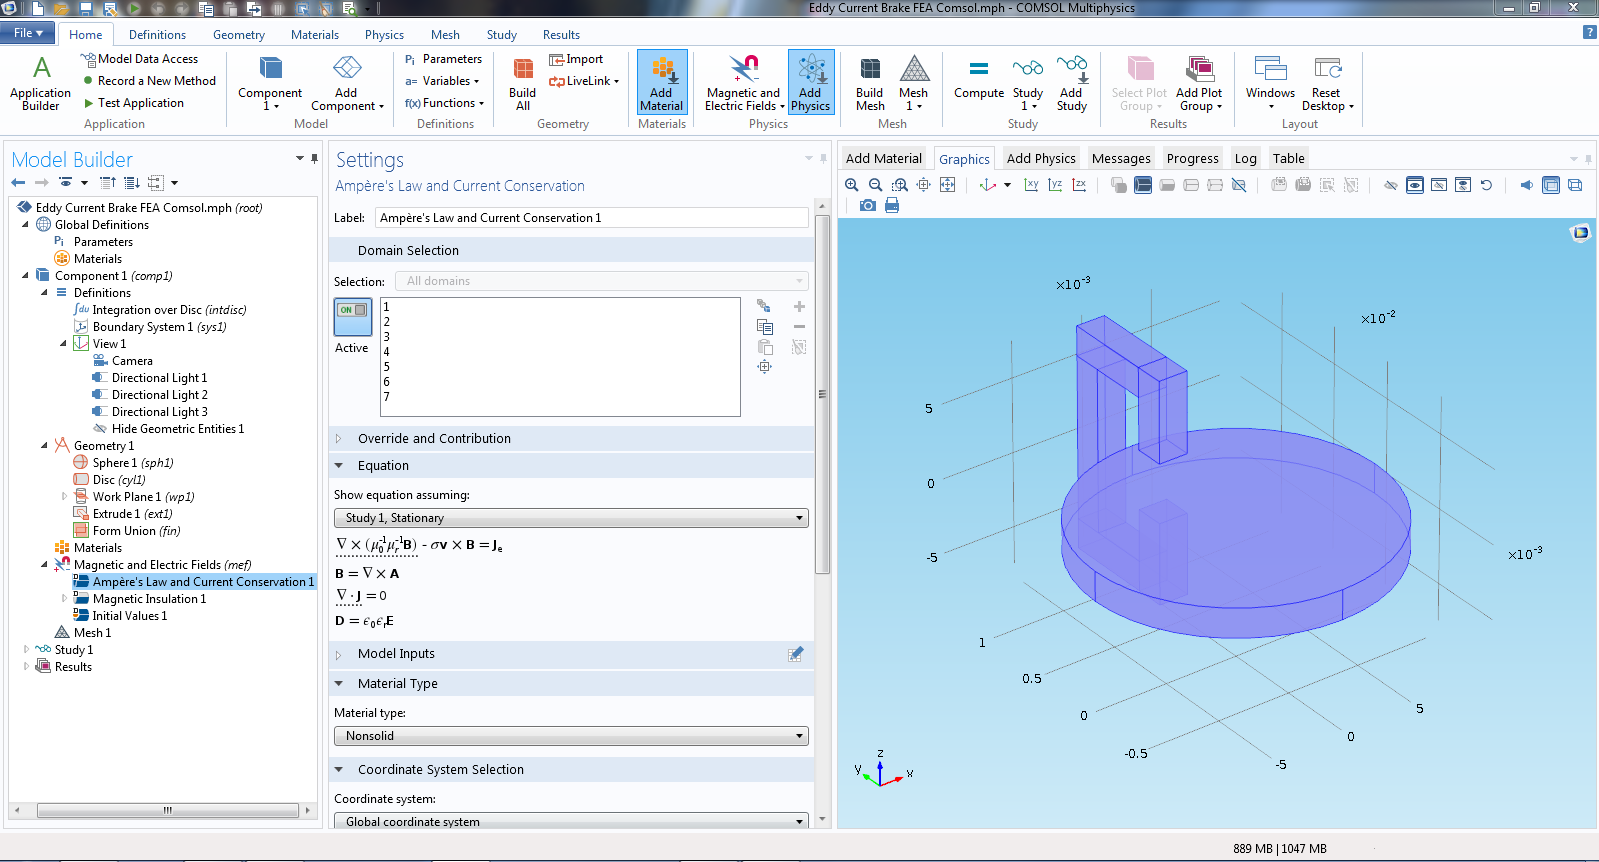

In [6]:
from IPython.display import Image
Image(filename='Images/FEA-geometry.png')

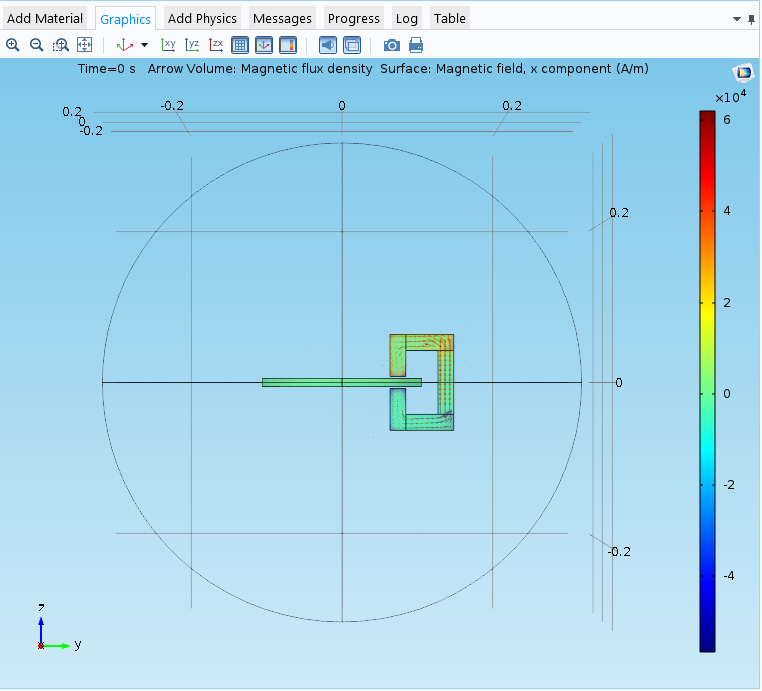

In [1]:
from IPython.display import Image
Image(filename='Images/magnfield.png')

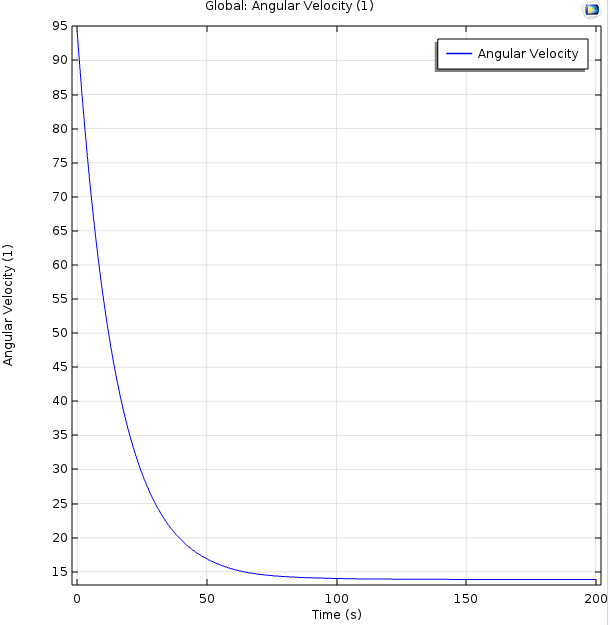

In [2]:
from IPython.display import Image
Image(filename='Images/w.png')

decreasing 900 rpm angular velocity